In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [3]:
df = pd.read_csv('cleaned_trip_data.csv', 
                 usecols=['medallion', 
                          'pickup_hour', 'pickup_day_of_month',
                         'pickup_longitude', 'pickup_latitude'])

df.head()

,medallion,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_month
0,E9A54865CAF737ED003957478C9D8FA1,-73.978104,40.752968,15,25
1,43D85E4D101135DDFC1BC16DF53665FE,-73.982315,40.764828,15,25
2,70166F37A5CC66D9A35366764ACC40DC,-73.982010,40.762508,9,25
3,0C05C17E209CA4C15F89107F9D686FF3,-73.976006,40.744480,6,25
4,0ECC4D3D2025A987532E1E5B5B26A119,-73.952621,40.780964,10,25


# Times

### What are the busiest times

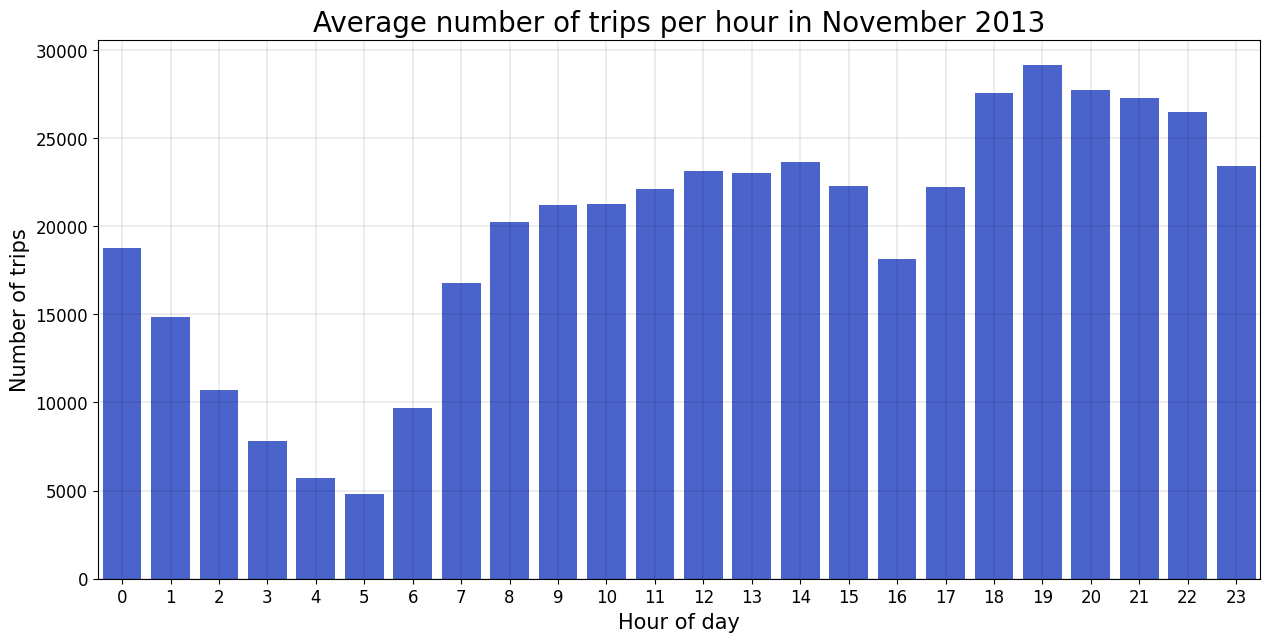

In [62]:
average_trips_per_hour = df.groupby('pickup_hour')['medallion'].count().reset_index().rename(columns={'medallion': 'trips'})
average_trips_per_hour['trips'] = average_trips_per_hour['trips']/30

# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=total_trips_per_hour,
           x='pickup_hour', y='trips',
           color='#3557E2')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

# plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average number of trips per pickup hour in November 2013",fontsize=20)
ax.set_xlabel("Hour of day",fontsize=15)
ax.set_ylabel("Number of trips",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.grid(True, color='black', linewidth=.1)

plt.show()

In [32]:
df.medallion.unique().shape

(13295,)

In [30]:
df.drop_duplicates(['pickup_hour', 'pickup_day_of_month', 'medallion'])

,medallion,hack_license,pickup_hour,pickup_day_of_month
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,15,25
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,15,25
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,9,25
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,6,25
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,10,25
...,...,...,...,...
14034032,5AB0EA850C469D14EA70883634FCD628,9AFC1BA3CC765D661488B839E70EBF75,20,25
14034036,E2DF7E5E63A654B9A655FBDCC0B029BF,9707EA6FF9C16FA88F2EB9D5EBECBC80,4,25
14034040,DBCD64B365502F85569B4A264B798AAE,C7C549905DD410DB9F7C44B83D70F79F,6,25
14034045,981161555DEE587A5BC8C928CB2514AE,F371B99C7A715A375CD4B035C32732E5,4,25


In [63]:
driver_per_hour_and_day_of_month = df.drop_duplicates(['pickup_hour', 'pickup_day_of_month', 'medallion'])

driver_per_hour_and_day_of_month = driver_per_hour_and_day_of_month.groupby(['pickup_day_of_month', 'pickup_hour'])['medallion'].count().reset_index().rename(columns={'medallion': 'drivers'})
driver_per_hour_and_day_of_month

,pickup_day_of_month,pickup_hour,drivers
0,1,0,9857
1,1,1,9051
2,1,2,7753
3,1,3,6140
4,1,4,4444
...,...,...,...
715,30,19,10167
716,30,20,10144
717,30,21,10022
718,30,22,10057


In [64]:
driver_per_hour_and_day_of_month.groupby('pickup_hour')['drivers'].mean().reset_index()

,pickup_hour,drivers
0,0,7994.933333
1,1,6274.400000
2,2,4883.000000
3,3,3822.900000
4,4,3111.500000
5,5,2928.366667
6,6,4761.900000
7,7,6818.833333
8,8,7982.666667
9,9,8759.433333


In [ ]:
# Check for revenure per driver in the hours rather than 

<Axes: xlabel='pickup_hour', ylabel='drivers'>

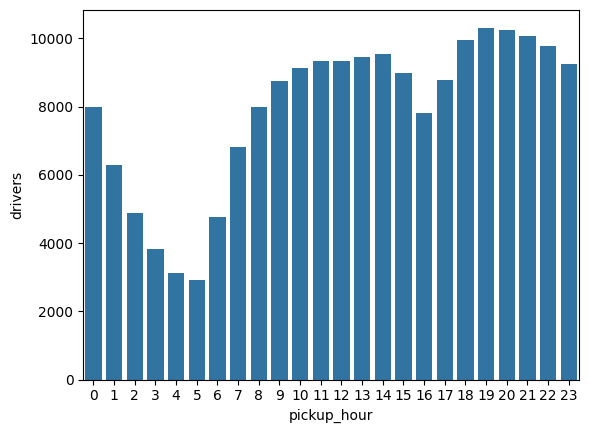

In [65]:
drivers_working_per_hour = driver_per_hour_and_day_of_month.groupby('pickup_hour')['drivers'].mean().reset_index()

sns.barplot(data=drivers_working_per_hour,
           x='pickup_hour', y='drivers')

<Axes: xlabel='hour', ylabel='trips_per_driver'>

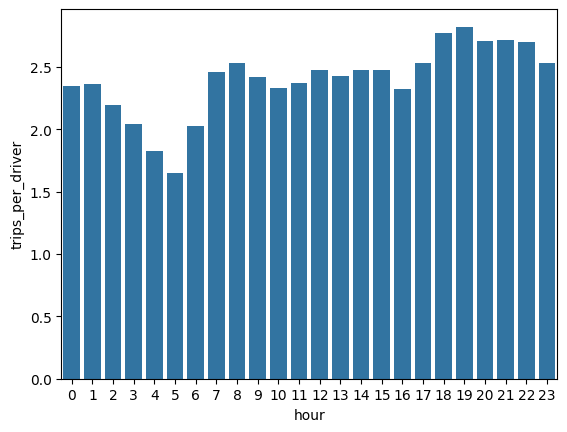

In [66]:
trips_per_driver_df = pd.DataFrame((total_trips_per_hour['trips']/drivers_working_per_hour['drivers']), columns=['trips_per_driver'])

trips_per_driver_df['hour'] = trips_per_driver_df.index

sns.barplot(data=trips_per_driver_df,
           x='hour', y='trips_per_driver')


In [67]:
trips_per_driver_df.sort_values('trips_per_driver', ascending=False)

,trips_per_driver,hour
19,2.823721,19
18,2.771501,18
21,2.714164,21
20,2.708972,20
22,2.703589,22
17,2.534131,17
8,2.531715,8
23,2.531452,23
14,2.480349,14
15,2.479979,15


In [69]:
average_trips_per_hour.sort_values('trips', ascending=False)

,pickup_hour,trips
19,19,29121.133333
20,20,27745.566667
18,18,27553.800000
21,21,27285.400000
22,22,26453.533333
14,14,23632.600000
23,23,23398.800000
12,12,23107.900000
13,13,23005.666667
15,15,22257.566667


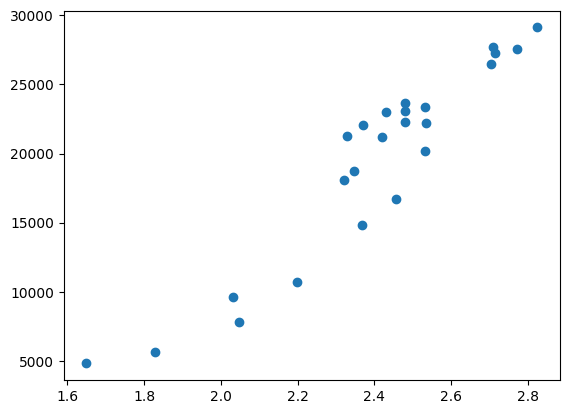

In [70]:
plt.scatter(trips_per_driver_df['trips_per_driver'], average_trips_per_hour['trips'])

# Location

### What are the busiest locations?

In [57]:
round_to = 2
df['rounded_lat'] = df['pickup_latitude'].round(round_to)
df['rounded_long'] = df['pickup_longitude'].round(round_to)
df

,medallion,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_month,rounded_area,rounded_lat,rounded_long
0,E9A54865CAF737ED003957478C9D8FA1,-73.978104,40.752968,15,25,"40.75 , -73.98",40.75,-73.98
1,43D85E4D101135DDFC1BC16DF53665FE,-73.982315,40.764828,15,25,"40.76 , -73.98",40.76,-73.98
2,70166F37A5CC66D9A35366764ACC40DC,-73.982010,40.762508,9,25,"40.76 , -73.98",40.76,-73.98
3,0C05C17E209CA4C15F89107F9D686FF3,-73.976006,40.744480,6,25,"40.74 , -73.98",40.74,-73.98
4,0ECC4D3D2025A987532E1E5B5B26A119,-73.952621,40.780964,10,25,"40.78 , -73.95",40.78,-73.95
...,...,...,...,...,...,...,...,...
14034045,981161555DEE587A5BC8C928CB2514AE,-73.949677,40.776268,4,25,"40.78 , -73.95",40.78,-73.95
14034046,926291789F6E904E920508D584D93301,-73.975464,40.755527,8,25,"40.76 , -73.98",40.76,-73.98
14034047,B5A2A6106AC22D527F0DAF3E68E6E320,-74.003677,40.748505,14,25,"40.75 , -74.0",40.75,-74.00
14034048,BE214ADD26750400C52407093C441701,-73.974876,40.782822,4,25,"40.78 , -73.97",40.78,-73.97


In [58]:
rounded_areas_trips = df[['rounded_lat', 'rounded_long']].value_counts().reset_index()
rounded_areas_trips

,rounded_lat,rounded_long,count
0,40.76,-73.97,859313
1,40.75,-73.99,791840
2,40.76,-73.98,704498
3,40.75,-73.98,677889
4,40.76,-73.99,621220
...,...,...,...
1330,40.92,-73.89,1
1331,40.92,-73.95,1
1332,40.92,-73.96,1
1333,40.92,-74.01,1


<Axes: xlabel='rounded_long', ylabel='rounded_lat'>

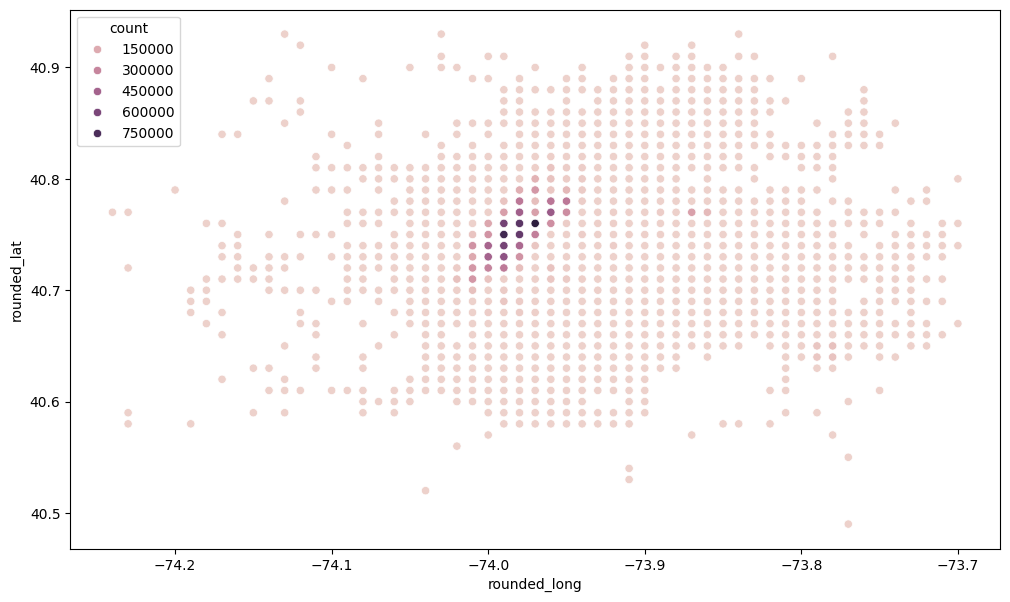

In [61]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.scatterplot(x="rounded_long",
                y="rounded_lat",
                data=rounded_areas_trips.head(1000),
                hue="count",
               marker='o')

In [27]:
rounded_areas_trips.dtypes

rounded_lat     object
rounded_long    object
count            int64
dtype: object